For this example, let’s take a sample data set containing 5 observations of heights: – 160, 165, 170, 175, 180.
The mean of the sample: 170.
The standard deviation of sample: 7.071.
n = 5

So look up the T-Table for 
degree of freedom = 5-1 = 4 
alpha = (1-0.95)/2 = 0.025.

In [9]:
from scipy import stats
#Studnt, n=999, p<0.05, 2-tail
#equivalent to Excel TINV(0.05,999)
print(stats.t.ppf(1-0.025, 4))

4.604094871415897


In [28]:
import pandas as pd #### Library for working with large datsets
import numpy as np #### Library for performing numerical calculations
import matplotlib.pyplot as plt #### Baasic Library for plotting graphs
#### Configuring Matplotlib to show Plots inline
%matplotlib inline 
plt.rcParams['figure.figsize'] = (12, 12) ### Setting the size of the Plots
from math import sqrt


In [13]:
#### Loading the Data
data = pd.read_csv('Fish_dataset.csv')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [16]:
one_hot_data = pd.get_dummies(data['Species'])
print(one_hot_data)
data = data.drop('Species',1)
#### and add the new dataframe to our existing dataframe
data = data.join(one_hot_data)
print(data)

     Bream  Parkki  Perch  Pike  Roach  Smelt  Whitefish
0        1       0      0     0      0      0          0
1        1       0      0     0      0      0          0
2        1       0      0     0      0      0          0
3        1       0      0     0      0      0          0
4        1       0      0     0      0      0          0
..     ...     ...    ...   ...    ...    ...        ...
154      0       0      0     0      0      1          0
155      0       0      0     0      0      1          0
156      0       0      0     0      0      1          0
157      0       0      0     0      0      1          0
158      0       0      0     0      0      1          0

[159 rows x 7 columns]
     Weight  Length1  Length2  Length3   Height   Width  Bream  Parkki  Perch  \
0     242.0     23.2     25.4     30.0  11.5200  4.0200      1       0      0   
1     290.0     24.0     26.3     31.2  12.4800  4.3056      1       0      0   
2     340.0     23.9     26.5     31.1  12.3778  

In [17]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486,0.220126,0.069182,0.352201,0.106918,0.125786,0.088050,0.037736
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804,0.415640,0.254566,0.479165,0.309986,0.332656,0.284263,0.191159
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
Y = data['Weight'].values

# = data[['GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF',
#        'FullBath','TotRmsAbvGrd','OverallQual','MasVnrArea','YearRemodAdd']]
X = data
X = X.drop('Weight',1)

X = X.fillna(0)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [19]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [21]:
# Fitting the Linear Regression Model to the dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = regressor.predict(X_test)

In [23]:
#### Error Metrics
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
print(mse)
rms = sqrt(mean_squared_error(y_test, y_pred))
print(rms)

17086.819831985566
130.71656295965545


In [24]:
#### R2 Error
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.9102350316202584


In [33]:
y_error = (y_test - y_pred)
y_error = y_error*y_error
y_error = np.sqrt(y_error)

In [ ]:
For this example, let’s take a sample data set containing 5 observations of heights: – 160, 165, 170, 175, 180.
The mean of the sample: 170.
The standard deviation of sample: 7.071.
n = 5

So look up the T-Table for 
degree of freedom = 5-1 = 4 
alpha = (1-0.95)/2 = 0.025.

Confidence Intervals = {170 – 2.776 (7.071/sqrt(5)), 170 + 2.776 (7.071/sqrt(5))}

In [38]:
n = len(y_error)
mean = np.mean(y_error)
sd = np.std(y_error)
alpha = (1-0.95)/2

In [39]:
t = stats.t.ppf(1-alpha, n-1)
print(t)

2.0395134463964077


In [44]:
interval = (t*(sd/sqrt(n)))
CI_LB = mean - interval
CI_UB = mean + interval
print(CI_LB, CI_UB)

54.08085234654325 123.31677713832542


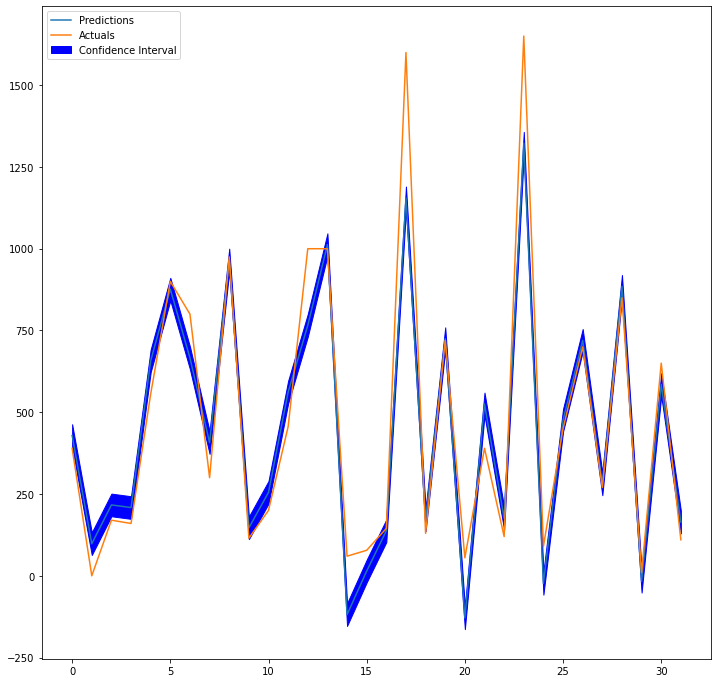

In [47]:
plt.fill_between(np.arange(0,len(y_test),1),y_pred+interval, y_pred-interval, color='b',label='Confidence Interval')
plt.plot(y_pred, label='Predictions')
plt.plot(y_test, label='Actuals')
plt.legend(loc="upper left")


In [49]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
iso = IsolationForest(contamination='auto',random_state=42)
y_pred = iso.fit_predict(X_train,y_train)

In [51]:
mask = y_pred!= -1 

In [52]:
X_train1, y_train1 = X_train[mask,:],y_train[mask]

In [55]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)
print(mean_absolute_error(y_pred,y_train))

y_pred = regressor.predict(X_test)
print(mean_absolute_error(y_pred,y_test))

regressor.fit(X_train1, y_train1)
y_pred = regressor.predict(X_train1)
print(mean_absolute_error(y_pred,y_train1))

y_pred = regressor.predict(X_test)
print(mean_absolute_error(y_pred,y_test))


60.7329609345903
88.69881474243434
43.078041493284275
89.04328917732279
